**Aim-** Use TensorFlow to build our first Sequential model.


In [ ]:
import numpy as np
import pandas as pd

## Generate Dataset



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=10, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Visualize Dataset
This is the same code from Assignment 1

In [ ]:
import matplotlib.pyplot as plt

# Your code here

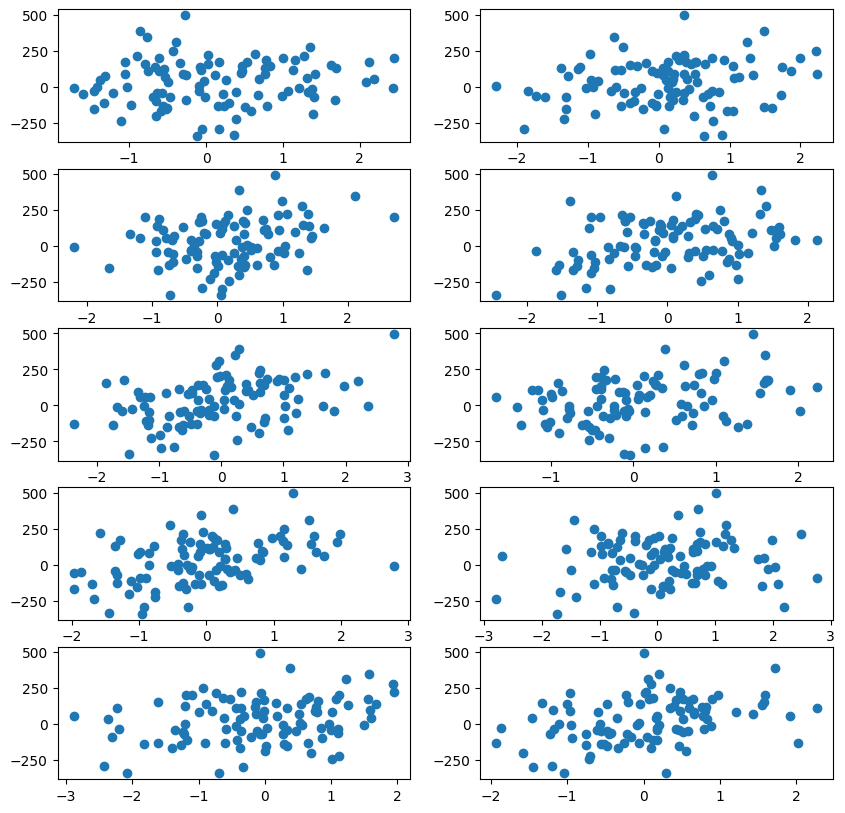

In [ ]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i in range(9):
    plt.subplot(521+i)
    plt.scatter(X[:,i],y)
plt.subplot(5,2,10)
plt.scatter(X[:,9],y)

[Note: Use this Link for help](https://www.tensorflow.org/tutorials/keras/regression)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 10 \\
> Dense of shape 50 \\
> Dense of shape 10 \\
Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Your code here
model = tf.keras.Sequential(
        [layers.Normalization(
           input_shape=[10]),
        layers.Dense(50),
        layers.Dense(10),
        layers.Dense(5),
        layers.Dense(1)
        ])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense_20 (Dense)            (None, 50)                550       
                                                                 
 dense_21 (Dense)            (None, 10)                510       
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,142
Trainable params: 1,121
Non-trainable params: 21
___________________________________________________

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(0.00001,1000,0.09)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
model.compile(optimizer=optimizer,loss="mean_squared_error")

In [ ]:
history=model.fit(X_train,y_train,epochs=500)

Epoch 1/500
3/3 [==============================] - 1s 8ms/step - loss: 25137.6367
Epoch 2/500
3/3 [==============================] - 0s 5ms/step - loss: 25111.7559
Epoch 3/500
3/3 [==============================] - 0s 5ms/step - loss: 25085.5176
Epoch 4/500
3/3 [==============================] - 0s 5ms/step - loss: 25061.0723
Epoch 5/500
3/3 [==============================] - 0s 5ms/step - loss: 25035.1621
Epoch 6/500
3/3 [==============================] - 0s 5ms/step - loss: 25007.7773
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 24983.2891
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 24955.8535
Epoch 9/500
3/3 [==============================] - 0s 6ms/step - loss: 24929.1914
Epoch 10/500
3/3 [==============================] - 0s 6ms/step - loss: 24898.1816
Epoch 11/500
3/3 [==============================] - 0s 7ms/step - loss: 24870.7773
Epoch 12/500
3/3 [==============================] - 0s 9ms/step - loss: 24841.9961
Epoch 13/500


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

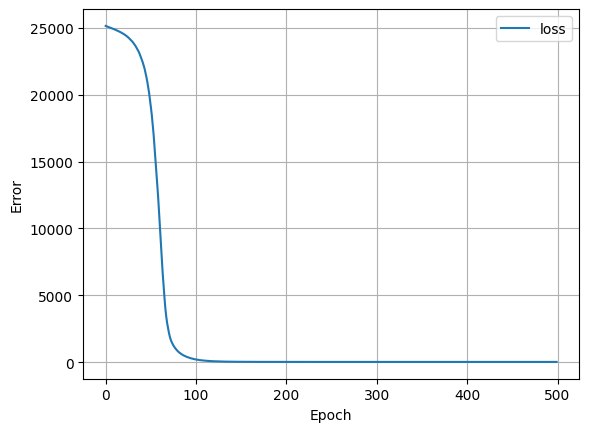

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [ ]:
# Insert the function for R2 Score
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

1/1 [==============================] - 0s 207ms/step


0.9990814734623613